# Context

In this notebook we will do some exploratory data analysis for the variable "monto"

# Load packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


# Load data

using relative paths

In [37]:
filename = "EDA_monto.ipynb" # Current file name
print(f'Current file name: {filename}\n')
print(f'Current absolute path: {os.getcwd()}\n')

# Specify the paths, relative to the current file
NOTEBOOKS_DIR = os.path.dirname(os.path.dirname(os.path.abspath(filename)))
BASE_DIR = os.path.dirname(NOTEBOOKS_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f'BASE_DIR: {BASE_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'OUTPUT_DIR: {OUTPUT_DIR}')

Current file name: EDA_monto.ipynb

Current absolute path: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\notebooks\univariate_analysis

BASE_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [38]:
df_clean = pd.read_excel(os.path.join(OUTPUT_DIR,"hallazgos_clean.xlsx" )).iloc[:,1:]
df_clean.head(2)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,distance_to_capital,is_rural,fecha_desembolso,visita_analista_credito,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes,calificacion_cartera,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,12,4,10,0,2021-06-11,NaT,4.0,11.0,6.0,NaN,0,0,Si,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,1,1,5,0,2021-06-15,2021-06-08,1.0,15.0,6.0,7.0,0,0,No,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


# Univariate analysis - monto

Next, we will do some data explorations to the monto variable, in order to gather valuable information that allow us to focus better the goal or solution.

In [39]:
print(f'Number of observations: {df_clean.shape[0]}')
print(f'Number of NA values: {df_clean.monto.isna().sum()}')

Number of observations: 2916
Number of NA values: 0


## Distribution

First, lets check the general distribution of the variable monto

In [40]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: ${round(df_clean.monto.mean(),1):,}')
print(f'Median: ${round(df_clean.monto.quantile(0.5),1):,}')
print(f'Mode: ${round(df_clean.monto.mode()[0],1):,}')
print(f'Min: ${round(df_clean.monto.min(),1):,}')
print(f'Max: ${round(df_clean.monto.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: ${round(df_clean.monto.std(),1):,}')
print(f"Variation coefficient: {round(df_clean['monto'].std() / df_clean['monto'].mean() * 100,1)}")
print(f"Range: ${round(df_clean['monto'].max() - df_clean['monto'].min(),1):,} ")
print(f"IQR: ${round(df_clean['monto'].quantile(0.75) - df_clean['monto'].quantile(0.25),1):,} ")

print("\n--Measures of distribution shape:")
print(f"Skewness: {round(df_clean['monto'].skew(),1)}")
print(f"Kurtosis: {round(df_clean['monto'].kurtosis(),1)}")

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df_clean['monto'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: ${int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: $8,032,992.9
Median: $3,751,294.0
Mode: $400,000
Min: $400,000
Max: $115,832,618

--Measures of dispersion:
standard deviation: $12,178,405.0
Variation coefficient: 151.6
Range: $115,432,618 
IQR: $5,766,664.5 

--Measures of distribution shape:
Skewness: 3.5
Kurtosis: 16.2

--Some percentiles:
['P10: $1,088,578', 'P25: $1,833,451', 'P50: $3,751,294', 'P75: $7,600,116', 'P90: $20,077,732']


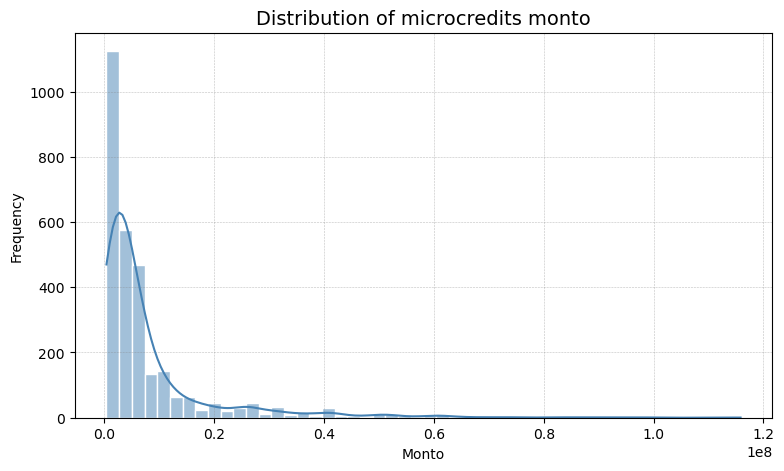

In [41]:
# histogram
plt.figure(figsize=(9, 5))
sns.histplot(x=df_clean.monto, edgecolor="white", color="steelblue", linewidth=1, bins=50, kde=True)
plt.title('Distribution of microcredits monto', fontsize=14)
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

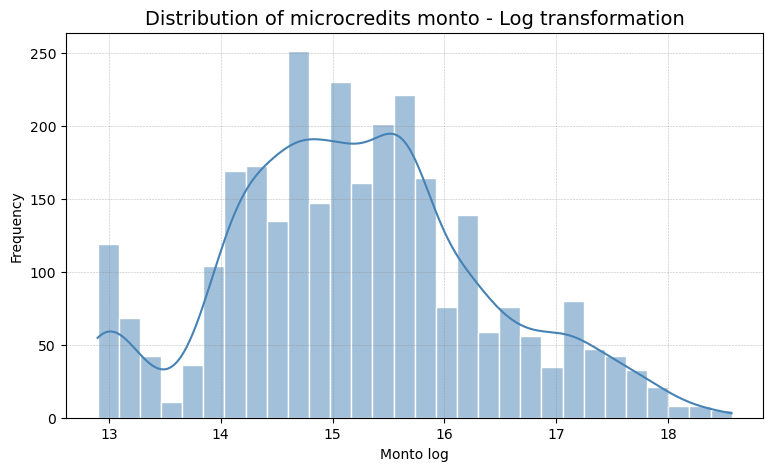

In [42]:
# histogram with logarithmic transformation
plt.figure(figsize=(9, 5))
sns.histplot(x=np.log(df_clean.monto), edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title('Distribution of microcredits monto - Log transformation', fontsize=14)
plt.xlabel("Monto log")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

## Check outliers

In [43]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df_clean.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df_clean.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df_clean.monto[(df_clean.monto < lower_limit) | (df_clean.monto > upper_limit)]
upper_outliers = df_clean[(df_clean.monto > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of microcredits consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df_clean.shape[0]*100,2)}%')


Lets calculate some outliers metrics:

Outliers upper limit: $16,250,112.75
Outliers lower limit: $0
Number of microcredits consider as outliers: 355
% of outliers of the total observations: 12.17%


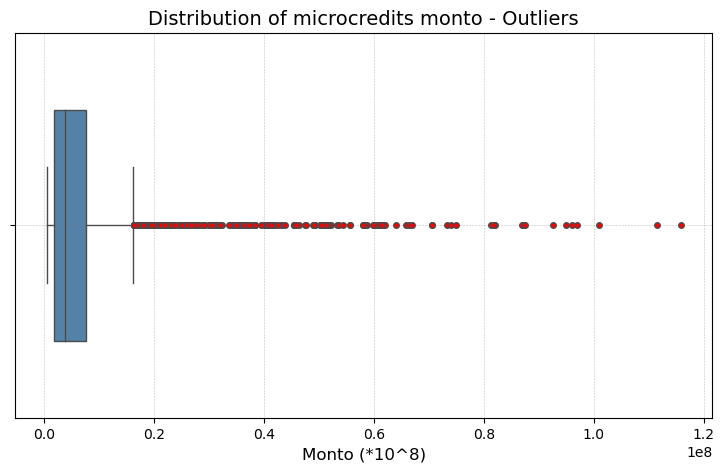

In [44]:
# Boxplot

plt.figure(figsize=(9, 5))
sns.boxplot(x=df_clean['monto'], color="steelblue", linewidth=1, width=0.6, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto - Outliers", fontsize=14)
plt.xlabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

## Other analysis and patterns

In [45]:
print("The most frequently requested loans are:")
df_clean.monto.value_counts()[0:10]

The most frequently requested loans are:


400000     113
500000      68
1000000     32
600000      30
1500000     29
1631982     21
2345852     13
700000      11
800000      11
8000000      9
Name: monto, dtype: int64

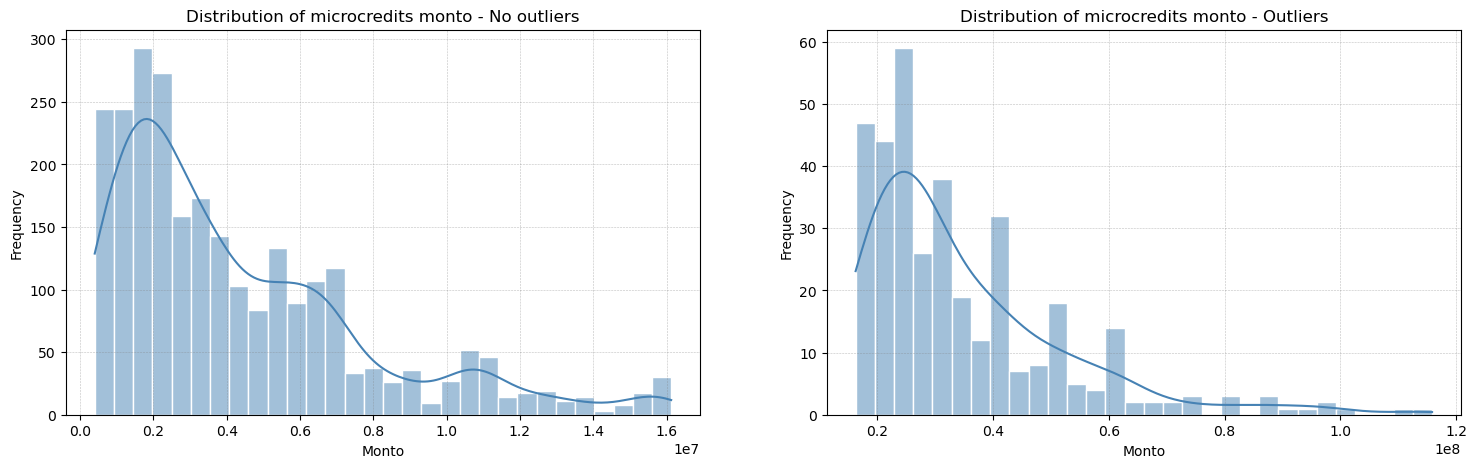

In [46]:
# lets check the distribution of monto spliting the outliers observations

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x = df_clean[df_clean.monto<upper_limit].monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - No outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x = upper_outliers.monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - Outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()


# Interpretation and results

A partir de las métricas, gráficos y análisis realizados sobre la variable monto, podemos resaltar los siguientes hallazgos:

- En primer lugar, notamos un rango muy amplio de monto de créditos, dado que, estos van desde $400.000 hasta $130.000.000. Lo anterior nos demuestra que la cartera de microcréditos cuenta con una variedad de perfiles de clientes amplia. 

- La media de los montos ($7,931,928) es significativamente mayor que la mediana ($3,736,415), lo que sugiere la presencia de valores extremos u outliers, es decir, la presencia de créditos de muy alto monto los cuales mueven el promedio.

- El monto más solicitado (moda) es de $400,000, solicitado un total de 123 ocasiones, lo que indica que la mayoría de los créditos son pequeños.

- Al aplicar una transformación logarítmica a la variable monto, observamos que los datos tienden a comportarse como una campana de gauss. Esto es un comportamiento común en distribuciones muy sesgadas.

- Revisando las métricas de dispersión, notamos la presencia de una alta dispersión en los montos otorgados. La alta desviación estándar ($12,339,723) y el coeficiente de variación (155.6%) indican que los montos de los microcréditos son muy variables o muy distintos. Esto nos indica que los créditos y montos aprobados dependen de diversos factores y criterios del banco.

- La asimetría de los datos (3.9) nos indica que la distribución tiene un sesgo positivo fuerte. Lo que sugiere que la distribución de los montos presenta una cola larga hacia la derecha (montos altos poco frecuentes pero muy grandes). La curtosis (20.7) nos indica lo mismo, la presencia de un pico de datos pronunciado y de valores extremos.

- Al revisar los percentiles de la data, observamos que el 75% de los créditos son menores a $7,254,207 y solo el 10% de los créditos superan los $19,691,704. Esto muestra que la mayoría de los créditos están en rangos relativamente bajos, mientras que hay algunos montos elevados que pueden representar riesgos mayores.

- Al desarrollar el análisis de valores outliers, notamos que más del 13% de los microcréditos están por encima del límite de outliers. Estos montos atípicos podrían estar asociados a un mayor riesgo de fraude, deficiencias en la asignación del crédito o condiciones especiales que justifican montos más altos. Es importante analizar si estos créditos presentan más hallazgos de auditoría en comparación con los montos más bajos.

- Al analizar los valores de monto más frecuentes, encontramos que los microcréditos más comunes están en un rango por debajo de $2,000,000.

- Por último, podemos apreciar que al dividir la data entre observaciones por debajo del umbral de valores outliers y por encima de este umbral, la forma y distribución para cada conjunto de datos es muy similar, con un sesgo  pronunciado hacia la derecha, lo cual evidencia que la mayoría de los créditos son de bajo monto.
